# Classification Using K-Nearest Neighbor Algorithm

# Practice

### Generate the Data

## Demo - 1.4: KNN using wine dataset

In [ ]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#reading .data file passing a parameter sep=','

df=pd.read_csv('/content/sample_data/wine.data',sep=',',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.shape

(178, 14)

In [ ]:
# to know different class labels
classes=df[0].value_counts()
classes

2    71
1    59
3    48
Name: 0, dtype: int64

9


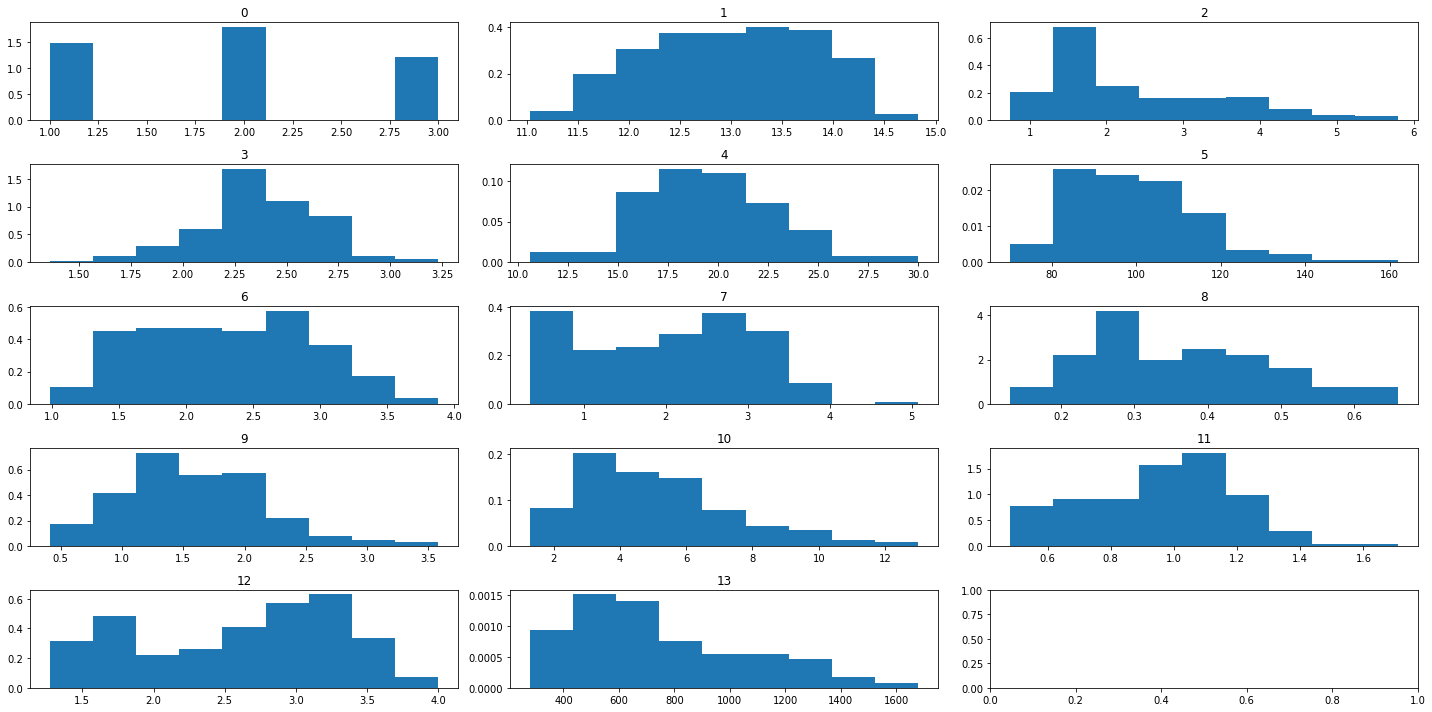

In [ ]:
# Histogram of all numerical features

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df1 = df.select_dtypes(include=numerics)
numeric_cols=df1.columns
num_cols=3

#To decide on the bin size using Sturge’s rule
#bins=1+ceil(log2(n))
  
bin_count = int(np.ceil(np.log2(len(df1.axes[0]))) + 1)
n_bins = bin_count
print(n_bins)

# compute number of rows for plot 
num_rows= int(len(numeric_cols)/num_cols)+1
# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))
# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
 ax.hist(df1[col],bins=n_bins,density=True)
 ax.set_title(col)
plt.show()

Inference: Do all the data columns have normal distribution? NO. There are skewness present in the data Cols 0,1,3,4,6 --> Normally distributed COls 2,5,7,8,9,10,11,13. --> Right skewed Cols 12-- Right Skewed

Skewed data are outliers that affect the model performance .So, to use a skewed data ,we have to apply a log transformation over the whole set of values to discover patterns in the data and make it usable for the statistical model

In [ ]:
#checking for missing values
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [ ]:
# Train test split  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x=df.iloc[:,1:]
y=df.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

y.head()

0    1
1    1
2    1
3    1
4    1
Name: 0, dtype: int64

In [ ]:
print(x.shape)
print(y.shape)

(178, 13)
(178,)


In [ ]:
# scaling the data with Zero mean and unit variance
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#Modelling
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
#printing accuracy
classifier.score(x_train,y_train)

0.9859154929577465

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Test Accuracy is',accuracy_score(y_test, y_pred))
print('Precision is',precision_score(y_test, y_pred,average='weighted'))
print('recall is',recall_score(y_test, y_pred,average='weighted'))


Test Accuracy is 0.9444444444444444
Precision is 0.9493827160493827
recall is 0.9444444444444444


#CLASSIFICATION REPORT

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.86      0.92        14
           3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



#Finding optimal value of K using mean error

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

##The above code executes a loop from 1 to 40. In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.

Text(0, 0.5, 'Mean Error')

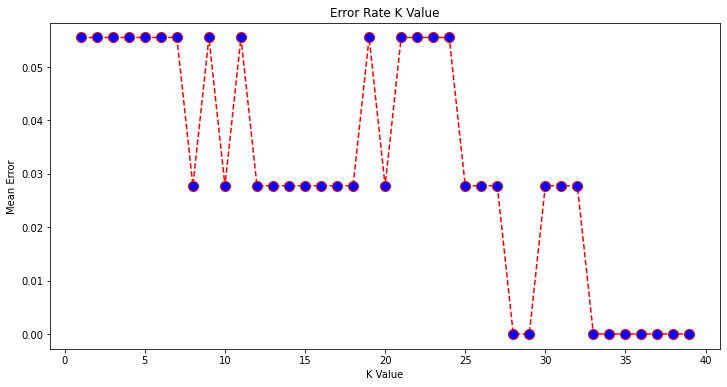

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Looking at the graph, the K vales between 28 and 39 is giving a low Mean error.

In [ ]:
#Training the model using new k value
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors=28)
classifier1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=28)

In [ ]:
y_pred1=classifier1.predict(x_test)
                            

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Comparing the model with K=5 and model with K=28,
the latter one gives 100% accuracy

In [ ]:
#type(x_test)
x_test=x_test.ravel()
y_test=y_test.ravel()
y_pred=y_pred.ravel()

In [ ]:
y_test[0]

1

In [ ]:
### Finding wrongly classified indices
indices = [i for i in range(len(y_test)) if y_test[i] != y_pred[i]]


In [ ]:
df_test = pd.DataFrame(x_test, columns = x.columns)
wrong_predictions = df_test.iloc[indices,:]

In [ ]:
wrong_predictions

,1,2,3,4,5,6,7,8,9,10,11,12,13
13,-0.255848,0.926818,-1.368801,-1.008898,-1.400336,-1.037168,-0.751641,0.484852,-1.337744,-0.713656,-1.099047,-0.657061,-1.204600
27,-0.745310,-1.020723,0.715786,-0.398895,-0.167384,0.206015,0.647481,0.015427,0.811510,-0.197015,1.001477,-0.406920,-0.188856


## PRINTING THE NEIGHBOURS OF THE MISCLASSIFIED INSTANCES

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(df_test)


NearestNeighbors()

In [ ]:
neigh.kneighbors((wrong_predictions),return_distance=False)

array([[13,  9, 32,  6, 28],
       [27, 16,  8, 10, 28]])

##Since K=5 is used above, the index of 5 neighbours of the 2 data points [index 13 and 27) are shown

In [ ]:
print(neigh.kneighbors((wrong_predictions)))

(array([[0.        , 2.9308748 , 3.01934034, 3.1101091 , 3.19678243],
       [0.        , 2.406346  , 2.48690233, 2.94430156, 3.00400182]]), array([[13,  9, 32,  6, 28],
       [27, 16,  8, 10, 28]]))


## Here, the distance of the data point to the other 5 data points are shown above